<a href="https://colab.research.google.com/github/SayedMohsen635/Algorithms-and-Data-Structures-training---IEEE-CS-ZSB/blob/main/vgg16_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import hamming
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.regularizers import L2
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [ ]:
# Prepare the dataset
dataset_path = '/content/drive/MyDrive/Graduation_Project/Iris/dataset'
image_size = (224, 224)  # VGG16 input size

# Load and preprocess the dataset
iris_images = []
labels = []

# Initialize the label encoder
label_encoder = LabelEncoder()

# Load and preprocess images
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path).convert('RGB')         # For VGG16
        image = image.resize(image_size)
        image = np.array(image)
        iris_images.append(image)
        labels.append(class_folder)

iris_images = np.array(iris_images)
labels = np.array(labels)

# Encode the class labels
labels = label_encoder.fit_transform(labels)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(iris_images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Create the directory if it doesn't exist
save_dir = '/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/'
os.makedirs(save_dir, exist_ok=True)

# Save the Numpy arrays
np.save(os.path.join(save_dir, 'X_train.npy'), X_train)
np.save(os.path.join(save_dir, 'X_test.npy'), X_test)
np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
np.save(os.path.join(save_dir, 'y_test.npy'), y_test)

np.save(os.path.join(save_dir, 'labels.npy'), labels)

In [ ]:
# Load the Numpy arrays
X_train = np.load('/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/y_test.npy')

labels = np.load('/content/drive/MyDrive/Graduation_Project/Iris/savesave_dataset/labels.npy')

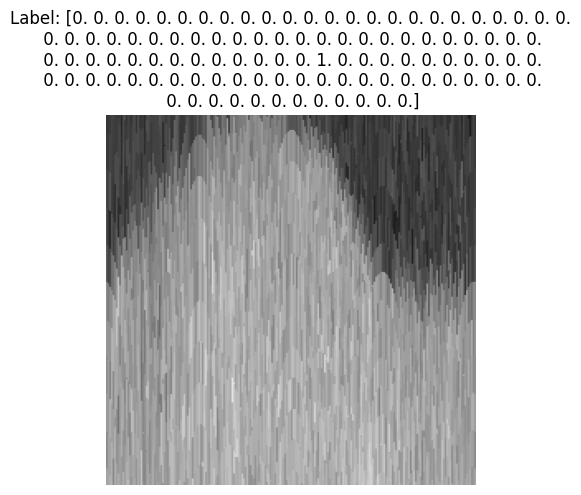

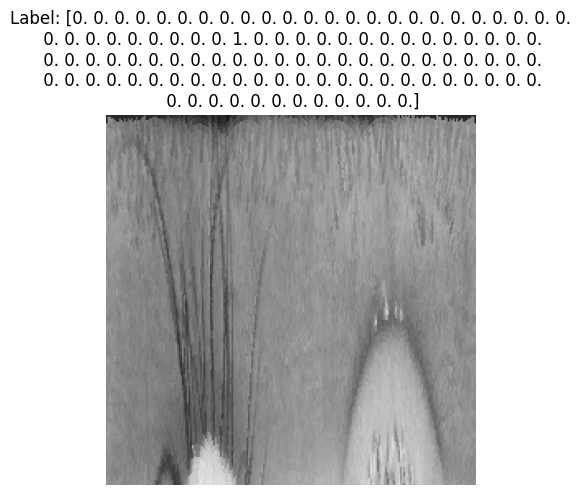

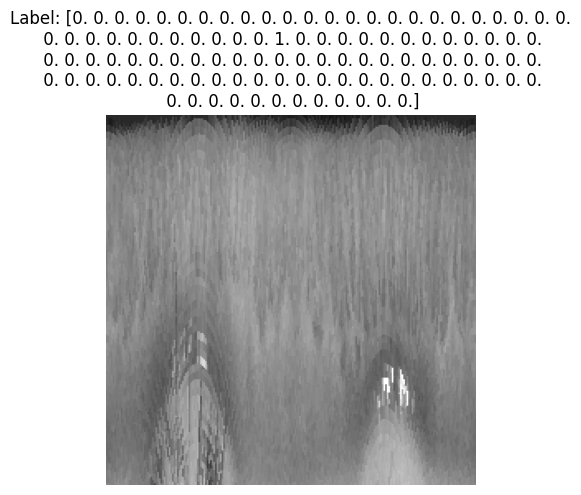

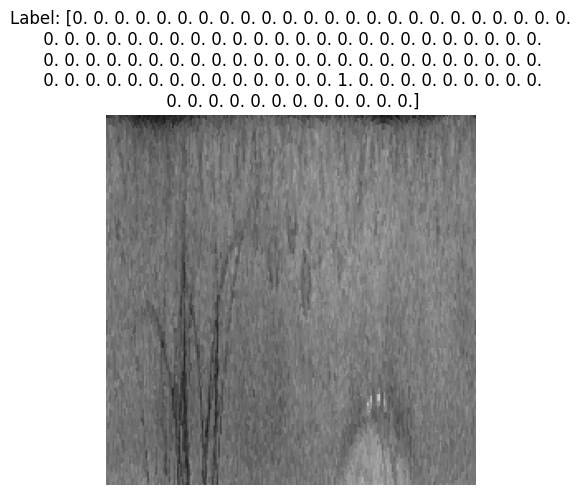

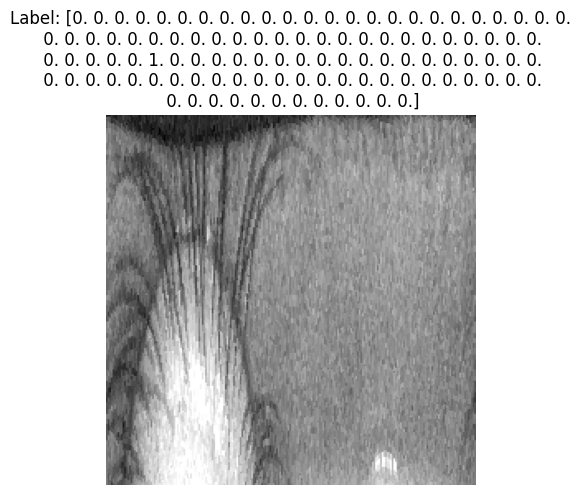

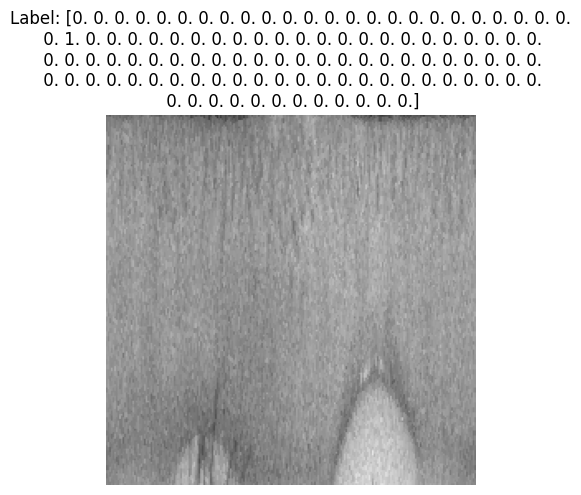

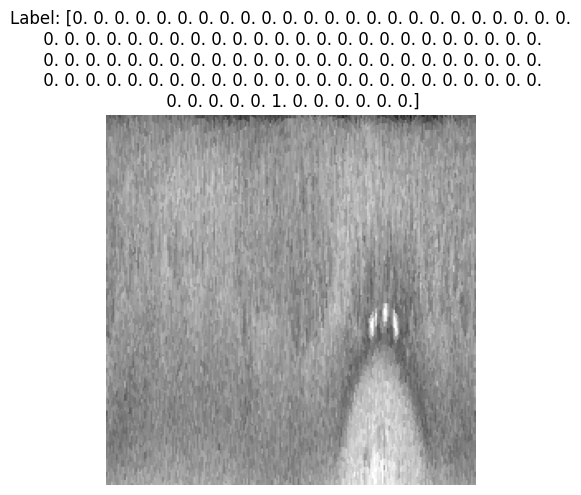

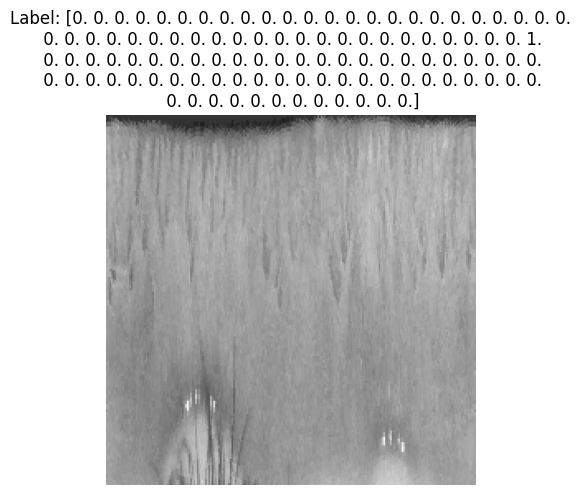

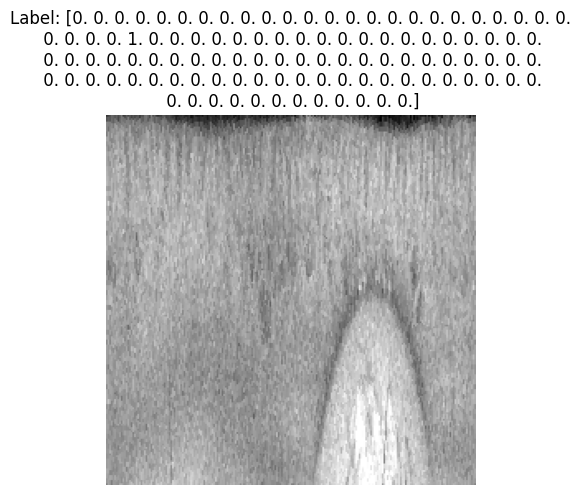

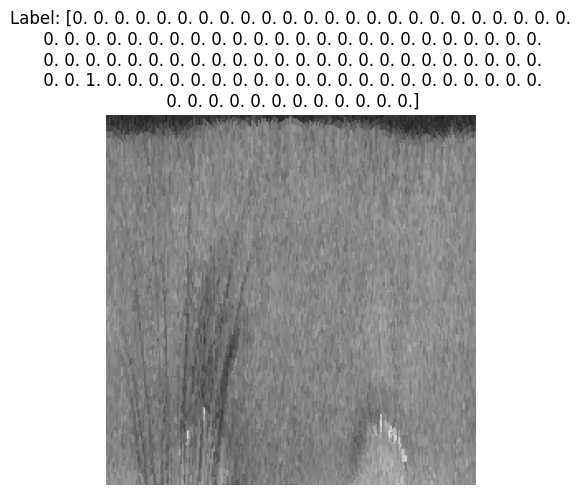

In [ ]:
# Training sample with their hot-encoding labels
for i in range(10):
    plt.imshow(X_train[i], cmap='gray')  # Assuming the images are grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

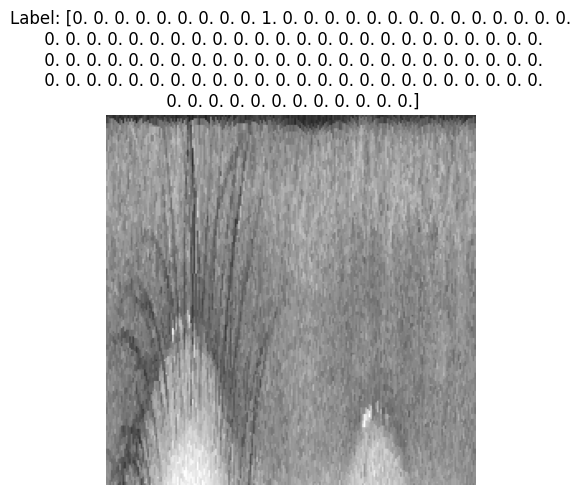

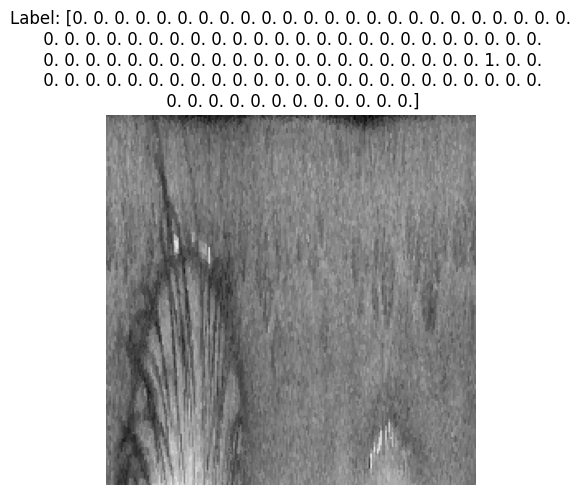

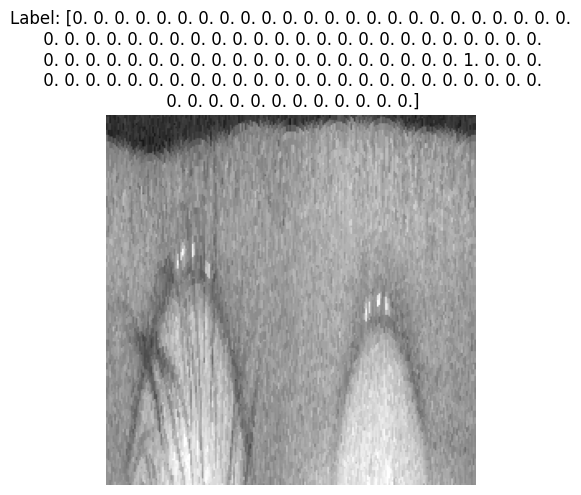

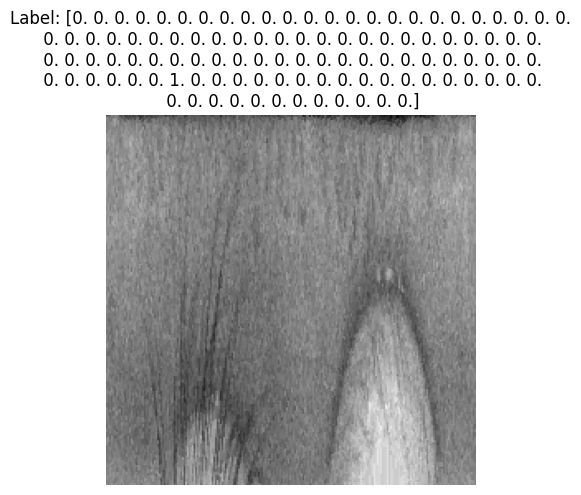

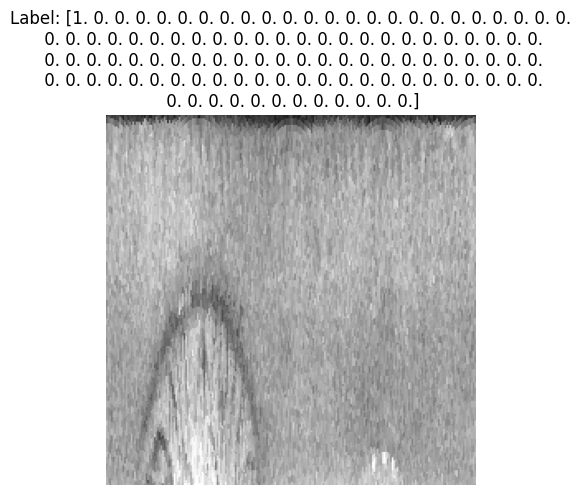

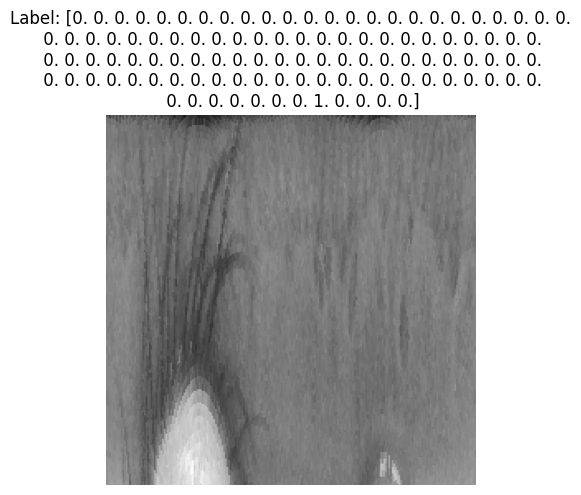

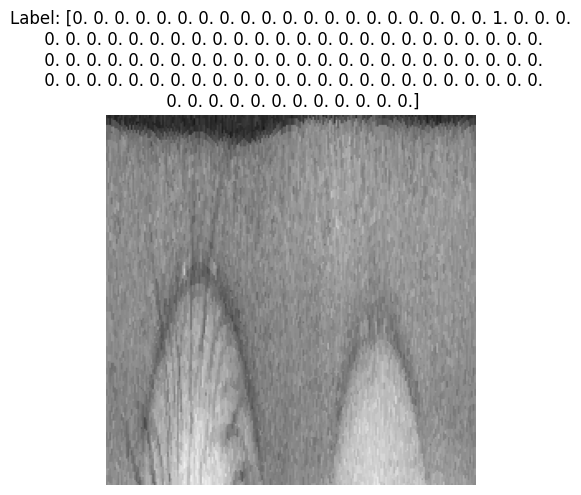

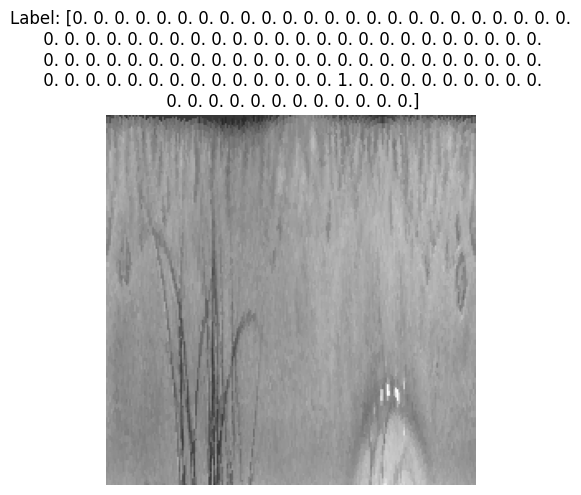

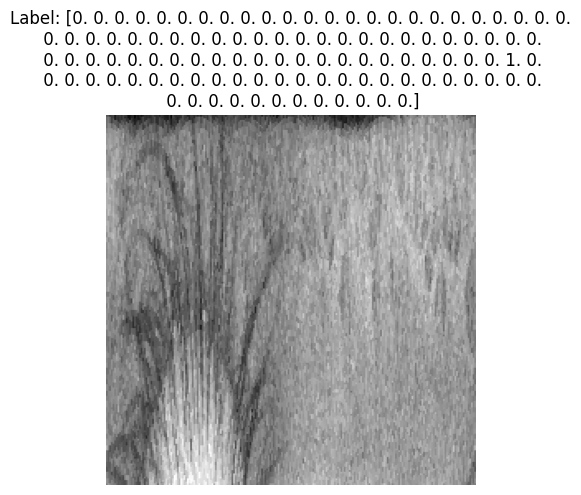

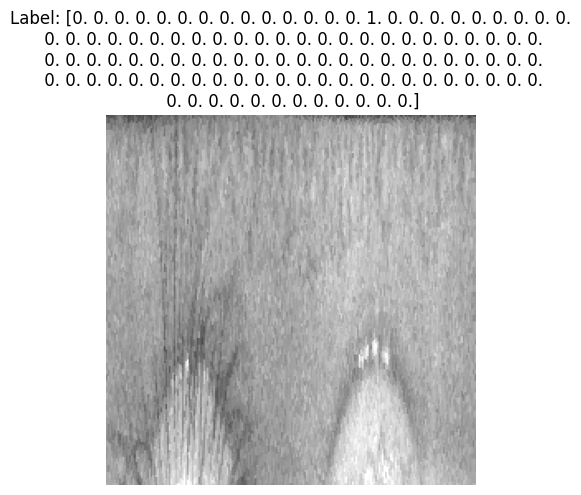

In [ ]:
# Testing sample with their hot-encoding labels
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')  # Assuming the images are grayscale
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf)
print(labels)

In [ ]:
np.set_printoptions(threshold=np.inf)
print(y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(labels.shape)

(3110, 224, 224, 3)
(778, 224, 224, 3)
(3110, 108)
(778, 108)
(3888,)


In [ ]:
# baseModel = tf.keras.applications.vgg16.VGG16()

In [ ]:
# baseModel.summary()

In [ ]:
# model = keras.Sequential()
# for layer in baseModel.layers[ : -1]:
#     model.add(layer)

In [ ]:
# # To make the model untrainable to save the old weights
# for layer in model.layers:
#     layer.trainable = False

In [ ]:
# num_classes = len(np.unique(labels))
# num_classes

108

In [ ]:
# model.add(keras.layers.Dense(num_classes, activation = 'softmax'))

In [ ]:
# model.summary()

In [ ]:
# model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# # train the model
# checkpointer = ModelCheckpoint(filepath='vgg.hdf5', verbose=1, save_best_only=True)
# history = model.fit(X_train, y_train, batch_size=4, epochs=2, shuffle=True, validation_data=(X_test, y_test), callbacks=[checkpointer])

In [ ]:
# plt.plot(history.history["accuracy"])
# plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title("model accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
# plt.show()

In [ ]:
# y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# accuracy = accuracy_score(y_true_labels, y_pred_labels)
# print("Accuracy:", accuracy)

25/25 [==============================] - 3s 117ms/step
Accuracy: 0.8213367609254498


# Save The Model

In [ ]:
model.save('/content/drive/MyDrive/Graduation_Project/Iris/BestModel')

# Load The Model

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Graduation_Project/Iris/BestModel')

In [ ]:
# loaded_model.save('/content/drive/MyDrive/Graduation_Project/Iris/BestSave/model_file.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
y_pred = loaded_model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = metrics.precision_score(y_true_labels, y_pred_labels, average='weighted')     # Average For All Classes
recall = metrics.recall_score(y_true_labels, y_pred_labels, average='weighted')           # Average For All Classes
f1 = metrics.f1_score(y_true_labels, y_pred_labels, average='weighted')                   # Average For All Classes
confusionMatrix = metrics.confusion_matrix(y_true_labels, y_pred_labels)
classificationReport = metrics.classification_report(y_true_labels, y_pred_labels)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print(confusionMatrix)

25/25 [==============================] - 16s 184ms/step
Accuracy: 0.8213367609254498
Precision: 0.8587139938039681
Recall: 0.8213367609254498
F1: 0.8223670996162181
[[10  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]


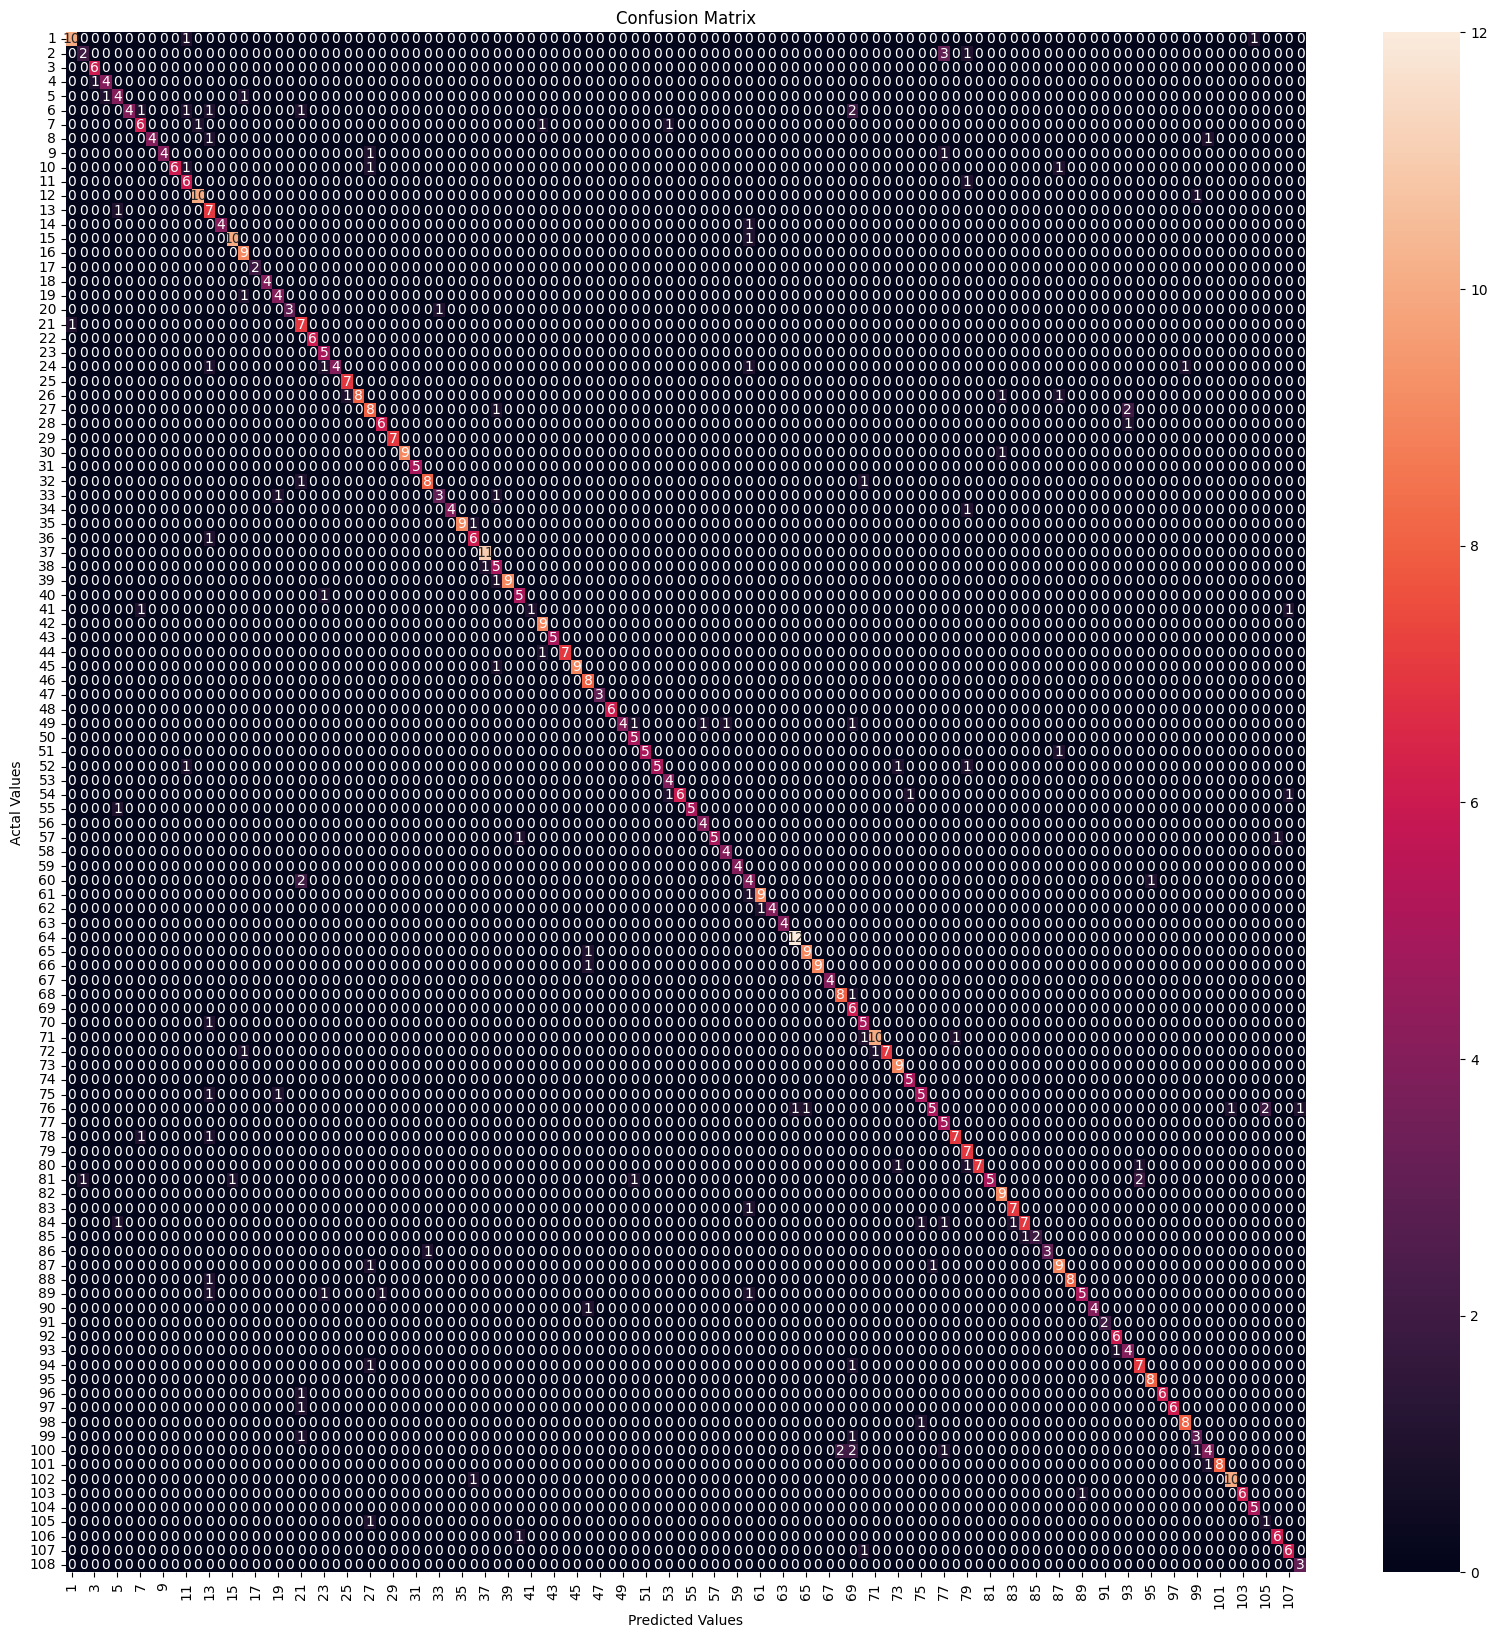

In [ ]:
# Plot the confusion matrix
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(confusionMatrix,
                     index = ['1','2','3', '4', '5', '6', '7', '8', '9', '10',
                              '11','12','13', '14', '15', '16', '17', '18', '19', '20',
                              '21','22','23', '24', '25', '26', '27', '28', '29', '30',
                              '31','32','33', '34', '35', '36', '37', '38', '39', '40',
                              '41','42','43', '44', '45', '46', '47', '48', '49', '50',
                              '51','52','53', '54', '55', '56', '57', '58', '59', '60',
                              '61','62','63', '64', '65', '66', '67', '68', '69', '70',
                              '71','72','73', '74', '75', '76', '77', '78', '79', '80',
                              '81','82','83', '84', '85', '86', '87', '88', '89', '90',
                              '91','92','93', '94', '95', '96', '97', '98', '99', '100',
                              '101','102','103', '104', '105', '106', '107', '108'],
                     columns = ['1','2','3', '4', '5', '6', '7', '8', '9', '10',
                              '11','12','13', '14', '15', '16', '17', '18', '19', '20',
                              '21','22','23', '24', '25', '26', '27', '28', '29', '30',
                              '31','32','33', '34', '35', '36', '37', '38', '39', '40',
                              '41','42','43', '44', '45', '46', '47', '48', '49', '50',
                              '51','52','53', '54', '55', '56', '57', '58', '59', '60',
                              '61','62','63', '64', '65', '66', '67', '68', '69', '70',
                              '71','72','73', '74', '75', '76', '77', '78', '79', '80',
                              '81','82','83', '84', '85', '86', '87', '88', '89', '90',
                              '91','92','93', '94', '95', '96', '97', '98', '99', '100',
                              '101','102','103', '104', '105', '106', '107', '108'])

#Plotting the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
confusionMatrix

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  3]])

# Testing

In [ ]:
def compare_with_threshold(feature1, feature2, threshold):
    distance = hamming(feature1, feature2)

    if distance <= threshold:
        print("Similar: Hamming distance = ", distance)
    else:
        print("Different: Hamming distance = ", distance)

In [ ]:
firstImage = load_img('/content/drive/MyDrive/Graduation_Project/Iris/dataset/28/normalized_0_028_1_1.bmp', target_size = (224, 224, 3))
firstArray = img_to_array(firstImage)
firstArray = np.expand_dims(firstArray, axis = 0)
feature_vector1 = loaded_model.predict(firstArray)
feature_vector1_1D = feature_vector1.reshape(-1)        # To suit hamming function

secondImage = load_img('/content/drive/MyDrive/Graduation_Project/Iris/dataset/28/normalized_028_1_1.bmp', target_size = (224, 224, 3))
secondArray = img_to_array(secondImage)
secondArray = np.expand_dims(secondArray, axis = 0)
feature_vector2 = loaded_model.predict(secondArray)
feature_vector2_1D = feature_vector2.reshape(-1)        # To suit hamming function

1/1 [==============================] - 0s 32ms/step


In [ ]:
compare_with_threshold(feature_vector1_1D, feature_vector2_1D, 0.97)

Similar: Hamming distance =  0.8796296296296297


In [ ]:
if feature_vector1_1D.argmax() == feature_vector2_1D.argmax():
  print("same class")
else:
  print("not the same")

same class


In [ ]:
print(feature_vector1_1D.argmax())  # Label of the class
print(feature_vector2_1D.argmax())  # Label of the class

10
10


In [ ]:
# Calculate the Hamming distance
distance = hamming(feature_vector1_1D, feature_vector2_1D)
print(distance)

0.0


In [ ]:
train_features = loaded_model.predict(X_train)
test_features = loaded_model.predict(X_test)

25/25 [==============================] - 3s 119ms/step


In [ ]:
train_features

In [ ]:
test_features # y_predicted

# ROC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, test_features, multi_class='ovr')

0.9797802169082901

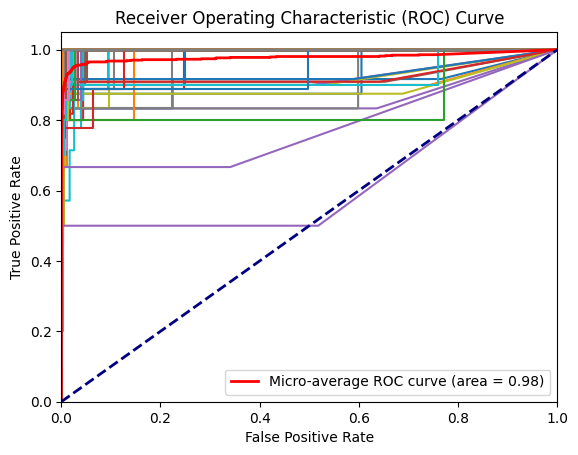

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = y_test.shape[1]

# Initialize arrays to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], test_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), test_features.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i])#, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='red', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the plot's limits, labels, and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
threshold = 0.98

# Calculate pairwise Euclidean distances between the test features and train features
distances = distance.cdist(test_features, train_features, 'euclidean')

# Find the closest matching class for each test feature
matches = []
for i in range(len(test_features)):
    closest_idx = np.argmin(distances[i])
    closest_distance = distances[i][closest_idx]

    if closest_distance <= threshold:
        match = y_train[closest_idx]
        matches.append(match)
    else:
        matches.append('Unknown')

# Print the matching results
for i in range(len(matches)):
    # print("Test Iris", i+1, ":", matches[i])
    print("Test Iris", i+1, ":", np.argmax(matches[i]))

Test Iris 1 : 9
Test Iris 2 : 69
Test Iris 3 : 68
Test Iris 4 : 78
Test Iris 5 : 0
Test Iris 6 : 103
Test Iris 7 : 20
Test Iris 8 : 26
Test Iris 9 : 70
Test Iris 10 : 14
Test Iris 11 : 84
Test Iris 12 : 44
Test Iris 13 : 4
Test Iris 14 : 11
Test Iris 15 : 86
Test Iris 16 : 31
Test Iris 17 : 34
Test Iris 18 : 72
Test Iris 19 : 79
Test Iris 20 : 45
Test Iris 21 : 24
Test Iris 22 : 16
Test Iris 23 : 79
Test Iris 24 : 74
Test Iris 25 : 67
Test Iris 26 : 31
Test Iris 27 : 26
Test Iris 28 : 35
Test Iris 29 : 22
Test Iris 30 : 15
Test Iris 31 : 72
Test Iris 32 : 10
Test Iris 33 : 62
Test Iris 34 : 15
Test Iris 35 : 60
Test Iris 36 : 10
Test Iris 37 : 65
Test Iris 38 : 43
Test Iris 39 : 105
Test Iris 40 : 65
Test Iris 41 : 18
Test Iris 42 : 43
Test Iris 43 : 11
Test Iris 44 : 43
Test Iris 45 : 29
Test Iris 46 : 96
Test Iris 47 : 7
Test Iris 48 : 95
Test Iris 49 : 35
Test Iris 50 : 45
Test Iris 51 : 50
Test Iris 52 : 64
Test Iris 53 : 52
Test Iris 54 : 94
Test Iris 55 : 52
Test Iris 56 : 28
Tes

In [ ]:
counter = 0
# 778 Test Image
# Count the number of matched images with test images
for i in range(len(matches)):
  if np.argmax(matches[i]) == np.argmax(y_test[i]):
    counter += 1
print("Correct Predictions = ", counter)
print("False Predictions = ", 778 - counter)

Correct Predictions =  635
False Predictions =  143
